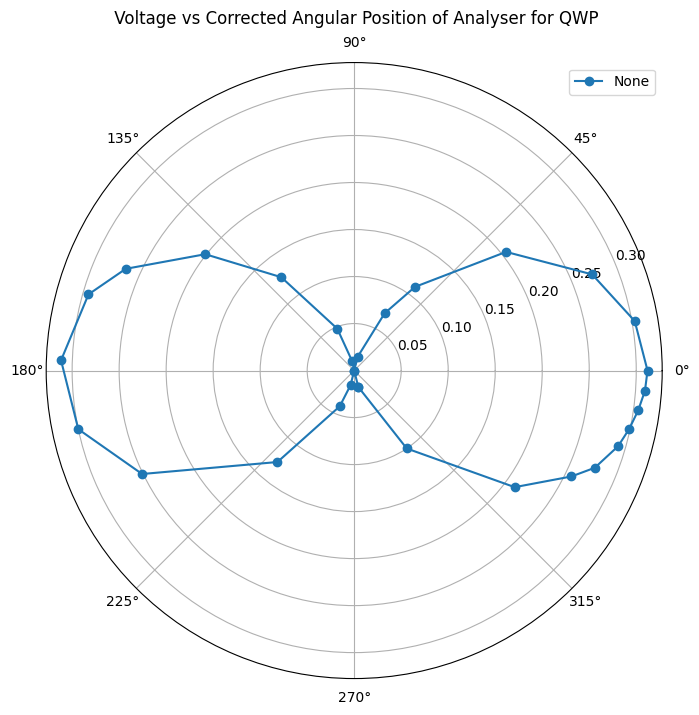

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

# Data from the table
angles = [0, 20, 40, 50, 54, 60, 64, 68, 72, 76, 86, 98, 114, 130, 138, 152, 162, 178,
          188, 204, 218, 232, 240, 254, 268, 282, 306, 324, 332, 342, 360]

voltages = [0.018, 0.1, 0.211, 0.257, 0.276, 0.292, 0.299, 0.305, 0.31, 0.312, 0.303, 0.273, 
            0.205, 0.11, 0.069, 0.015, 0, 0.01, 0.048, 0.126, 0.201, 0.266, 0.294, 0.312, 
            0.3, 0.251, 0.127, 0.041, 0.016, 0, 0.018]
corr_angles=[(i-76) for i in angles]

def polar_plot(angles,voltages,lab=None):
    # Convert angles to radians for polar plot
    angles_rad = np.deg2rad(angles)
    # Create polar plot
    
    ax = plt.subplot(111, projection='polar')
    ax.plot(angles_rad, voltages, marker='o', linestyle='-', label=f"{lab}")
    ax.set_title(" Voltage vs Corrected Angular Position of Analyser for QWP", va='bottom')
    ax.legend(loc="upper right")
    return
plt.figure(figsize=(8,8))
# polar_plot(angles,voltages)
polar_plot(corr_angles,voltages)
plt.show()


In [ ]:
cos_sqr=[(np.cos(np.deg2rad(i)))**2 for i in corr_angles]
plt.scatter(cos_sqr,voltages)
plt.grid(True)
plt.show()


In [ ]:
def lsqfit(dataset):
  keys = list(dataset.keys())
  values = list(dataset.values())

  #Printing datatable
  table1 = PrettyTable(["i", "x", "y", "x^2" , "xy"])
  n = len(keys)
  count = 1
  Σx2 = 0
  Σxy = 0
  for i in keys:
    table1.add_row([count , i , dataset[i], i**2, i*dataset[i]])
    Σx2 += i**2
    Σxy += i*dataset[i]
    count+=1
  table1.add_row(["TOTAL - ", '', '', '', ''])
  table1.add_row(['', sum(keys), sum(values), Σx2, Σxy])
  table1.title = " Input data "
  print()
  # print(table1)
  print()

  #Finding slope and intercept
  A = np.array( [[n,sum(keys)] , [sum(keys) , Σx2]] )
  B = np.array( [sum(values) , Σxy])
  X = np.linalg.solve(A,B)
  def f(x):
    return X[0] + X[1]*x

  #Error analysis
  error_sum = 0
  for i in keys:
    error_sum += (dataset[i] - f(i))**2
  error_y = (error_sum/ (n - 2))**0.5
  delta = n*Σx2 - sum(keys)**2
  error_slope = error_y * (n/delta)**0.5
  error_intercept = error_y * (Σx2/delta)**0.5

  #Printing slopes,intercepts and errors
  table2 = PrettyTable()
  table2.title = "Slope, Intercept and Errors"
  table2.add_row(["Slope" , round(X[1],4) ])
  table2.add_row(["Intercept" , round(X[0],4) ])
  table2.add_row(["Error in y", round(error_y,4) ])
  table2.add_row(["Delta" , round(delta,4) ])
  table2.add_row(["Error in slope", round(error_slope,4) ])
  table2.add_row(["Error in intercept", round(error_intercept,4) ])
  print(table2)
  print()

  # #Printing the function values
  # table3 = PrettyTable(["x" , "y = a_0 + a_1 x"])
  # table3.title ="Function values"
  # for i in keys:
  #   table3.add_row([i, round(f(i),3)])
  # print(table3)

  #Plotting the line
  plt.plot(keys, values, "o", markersize = 4)
  x1 = np.array(keys+[0,max([keys[len(keys)-1] , values[len(values)-1]])])
  f_v = np.vectorize(f)
  y1 = f_v(x1)
  plt.plot(x1,y1, label = f'Least-square fit line') #: y = {round(X[1],2)}±{round(error_slope,2)}x + {round(X[0],2)}±{round(error_intercept,2)}
  # plt.xlim(0,max([keys[len(keys)-1] , values[len(values)-1]])+1)
  # plt.ylim(0,max([keys[len(keys)-1] , values[len(values)-1]])+1)
  plt.grid(True)
  plt.xlabel(r"$\cos^2(\theta)$")
  plt.ylabel ( "V")
  plt.legend()
  plt.show()

data={cos_sqr[i]:voltages[i] for i in range(len(cos_sqr))}
lsqfit(data)

In [ ]:
theta_corr_2=[-76,-66,-56,-48,-40,-32,-22,-14,-4,18,32,40,46,64,70,80,86,106,120,130,142,154,164,176,204,224,234,244,256,266,274,284]
V2=[0.281,0.246,0.205,0.165,0.119,0.078,0.04,0.016,0,0.032,0.092,0.136,0.211,0.255,0.275,0.296,0.301,0.278,0.221,0.179,0.106,0.055,0.019,0,0.053,0.152,0.207,0.26,0.29,0.302,0.3,0.283]

plt.figure(figsize=(8,8))
# polar_plot(angles,voltages)
polar_plot(corr_angles,voltages,lab='without HWP')
polar_plot(theta_corr_2,V2,lab='with HWP')
plt.show()


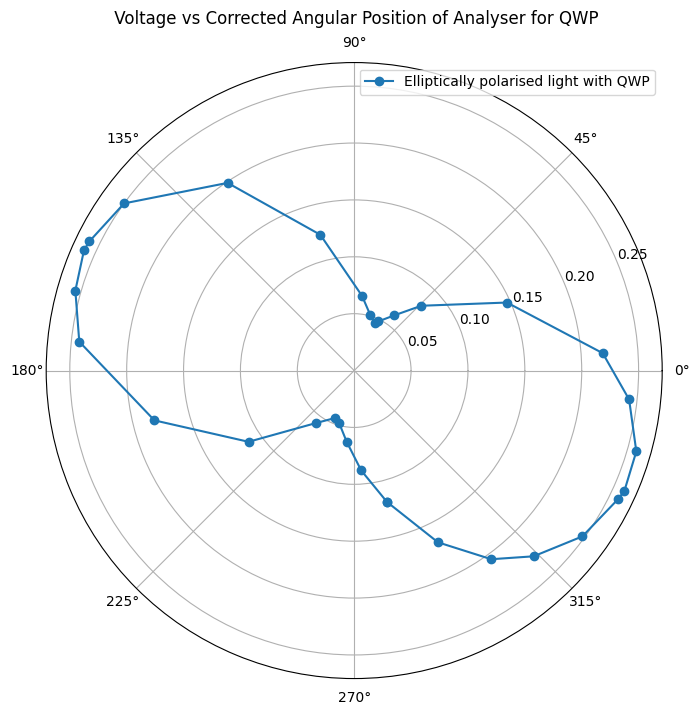

In [17]:
theta_corr_3=[-76,-64,-54,-46,-36,-26,-24,-16,-6,4,24,44,54,64,66,74,84,104,124,144,154,156,164,174,194,214,234,248,254,264,274,284]
V3=[0.119,0.168,0.205,0.227,0.248,0.258,0.26,0.258,0.243,0.219,0.147,0.082,0.06,0.048,0.046,0.051,0.066,0.123,0.199,0.25,0.259,0.26,0.255,0.243,0.181,0.112,0.057,0.045,0.048,0.063,0.088,0.119]
plt.figure(figsize=(8,8))
polar_plot(theta_corr_3,V3,lab='Elliptically polarised light with QWP')
